# Compound Dual optimality for $D$-$G$-optimality.

The optimization problem is 
$$
\begin{aligned}
    \min_{\boldsymbol{w,t}} \quad & \alpha \cdot t - (1-\alpha) \cdot \log\det(M) \\
    \text{subject to} \quad & \sum_i w_i = 1, \\
                            & w_i \ge 0,\quad \forall i,\\
                            & g^\top(x_i) M^{-1} g(x_i) \le t,\quad \forall i
\end{aligned}
$$
where $\alpha\in[0,1]$.

Here we investigate the optimal designs with various values of $\alpha$ and plot the equivalence theorem in each case.


[α = 0.0] Support points and weights:
x = -1.000, weight = 0.333
x = 0.100, weight = 0.333
x = 1.000, weight = 0.333


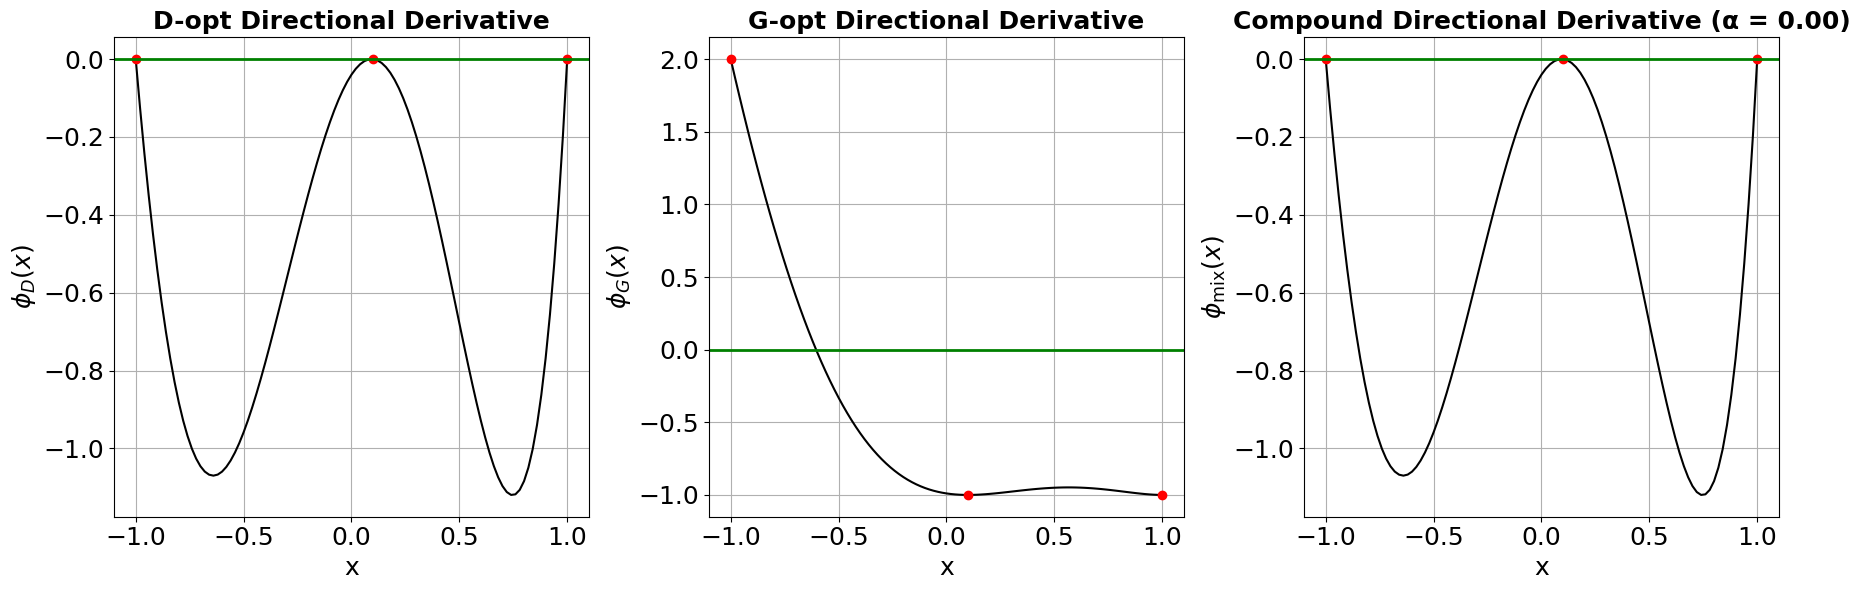


[α = 0.1] Support points and weights:
x = -1.000, weight = 0.344
x = 0.100, weight = 0.328
x = 1.000, weight = 0.328


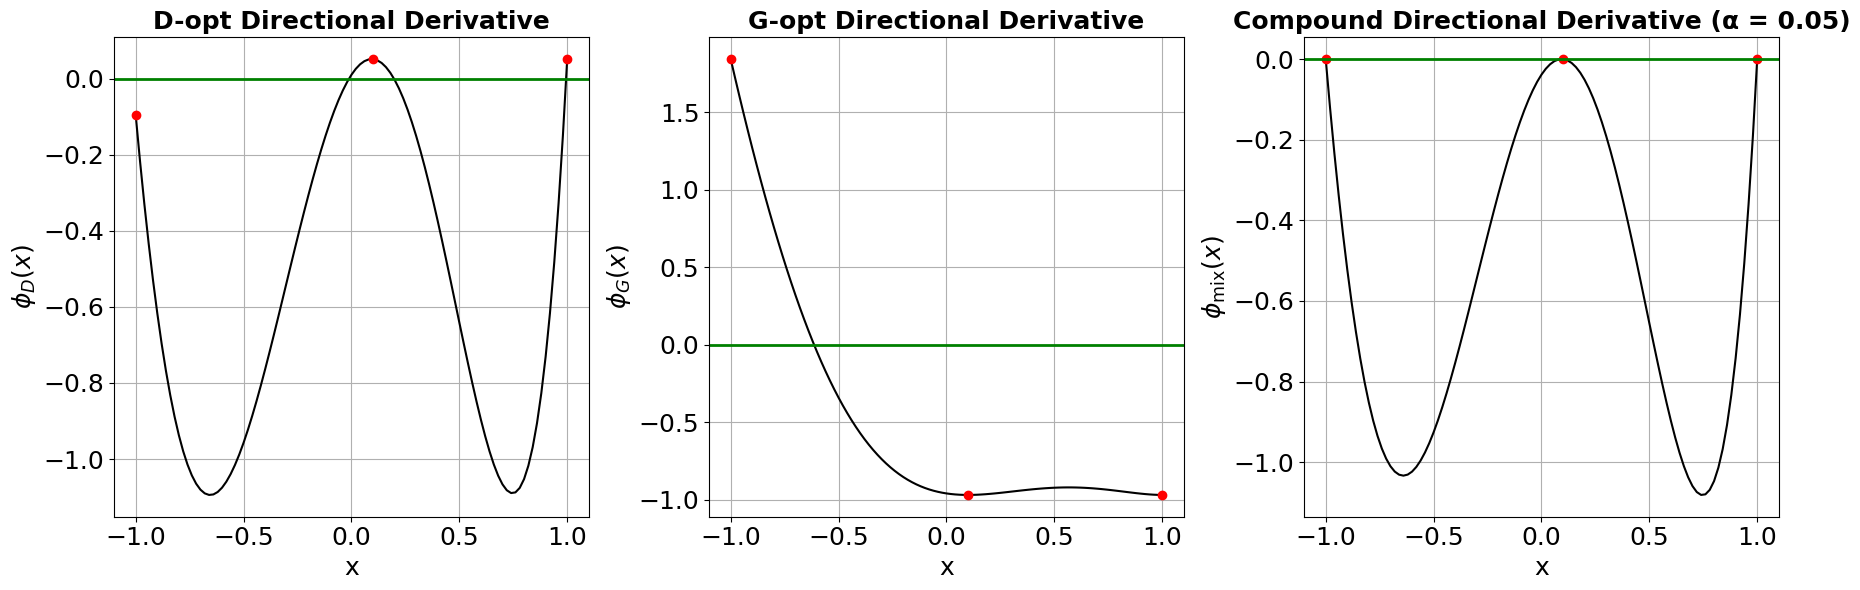


[α = 0.1] Support points and weights:
x = -1.000, weight = 0.356
x = 0.100, weight = 0.322
x = 1.000, weight = 0.322


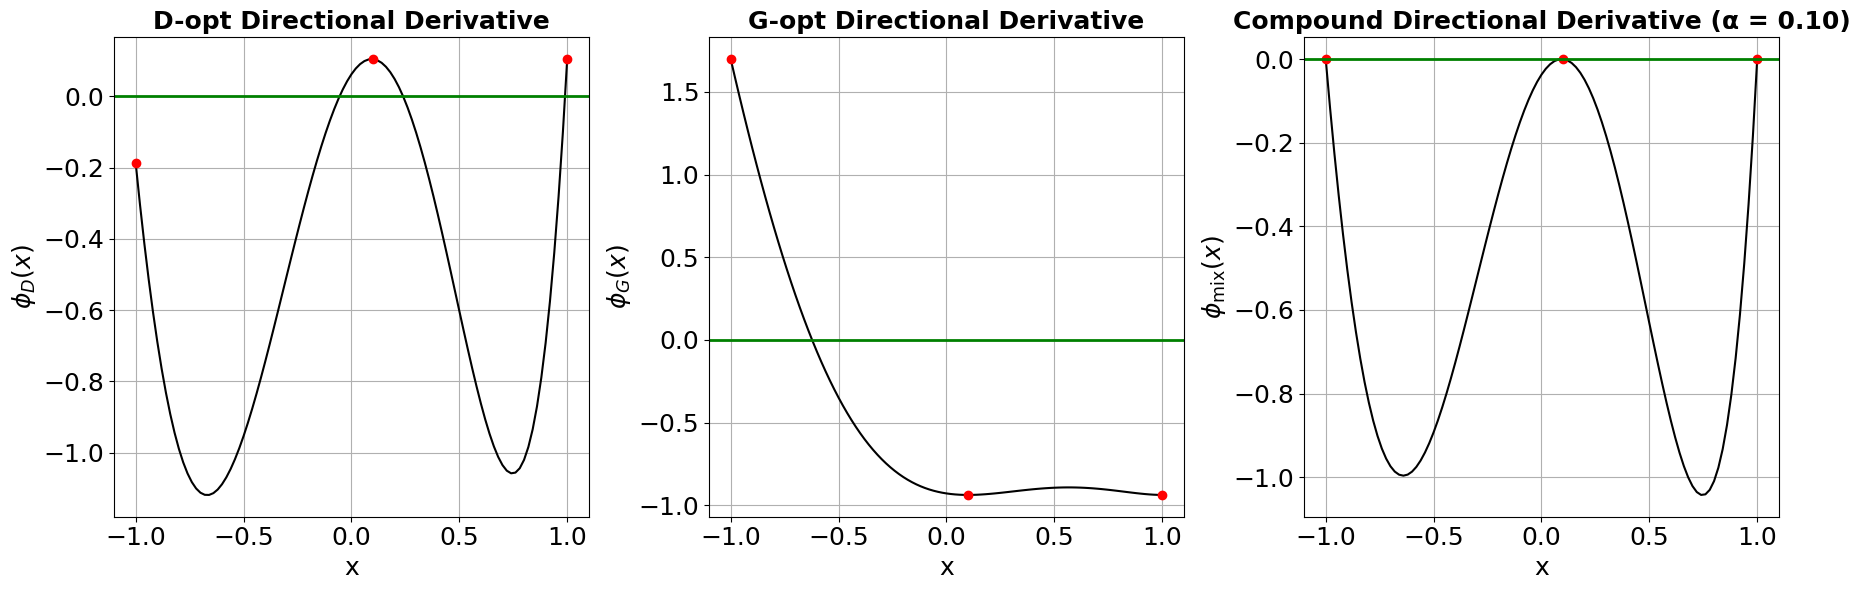


[α = 0.2] Support points and weights:
x = -1.000, weight = 0.367
x = 0.100, weight = 0.316
x = 1.000, weight = 0.316


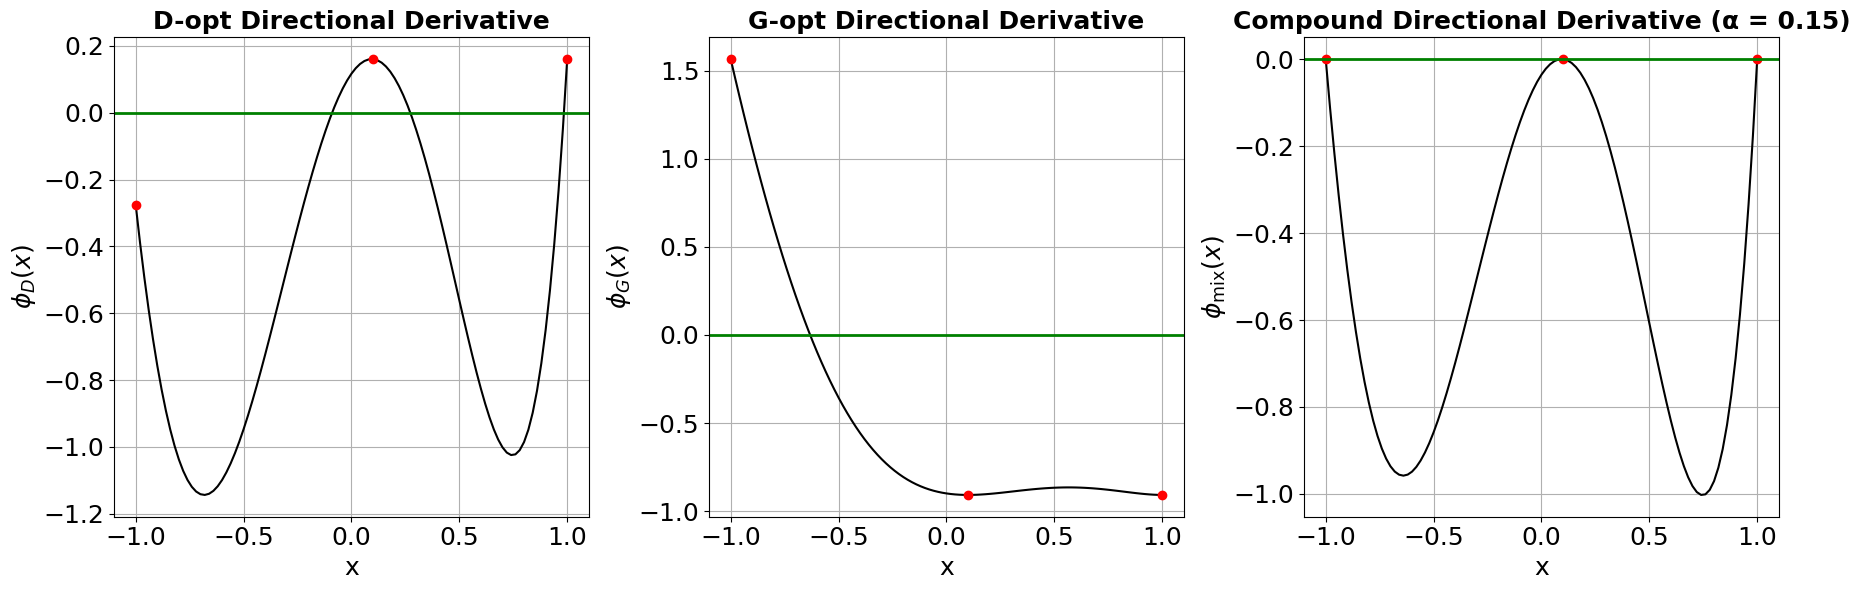


[α = 0.2] Support points and weights:
x = -1.000, weight = 0.379
x = 0.100, weight = 0.311
x = 1.000, weight = 0.311


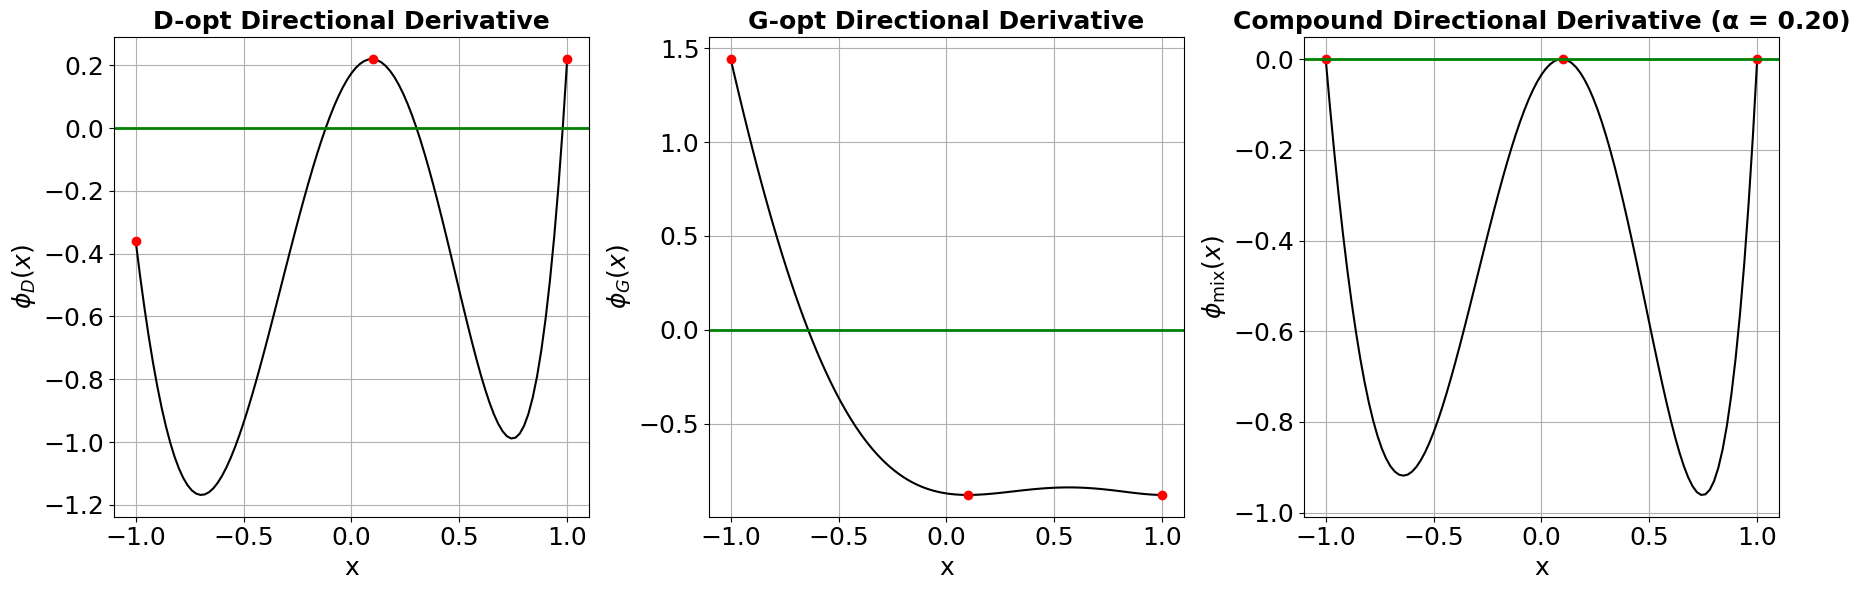


[α = 0.2] Support points and weights:
x = -1.000, weight = 0.391
x = 0.100, weight = 0.304
x = 1.000, weight = 0.304


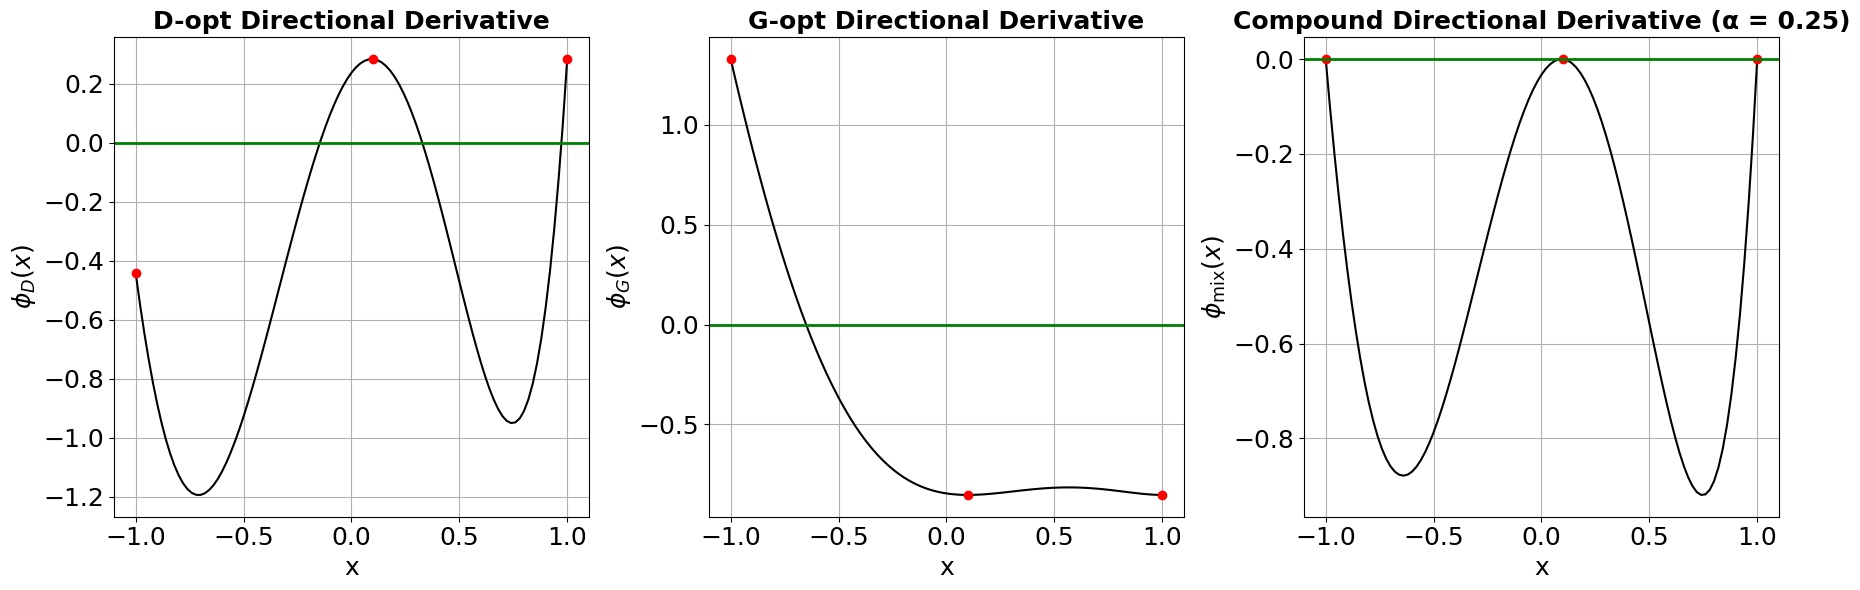


[α = 0.3] Support points and weights:
x = -1.000, weight = 0.404
x = 0.100, weight = 0.298
x = 1.000, weight = 0.298


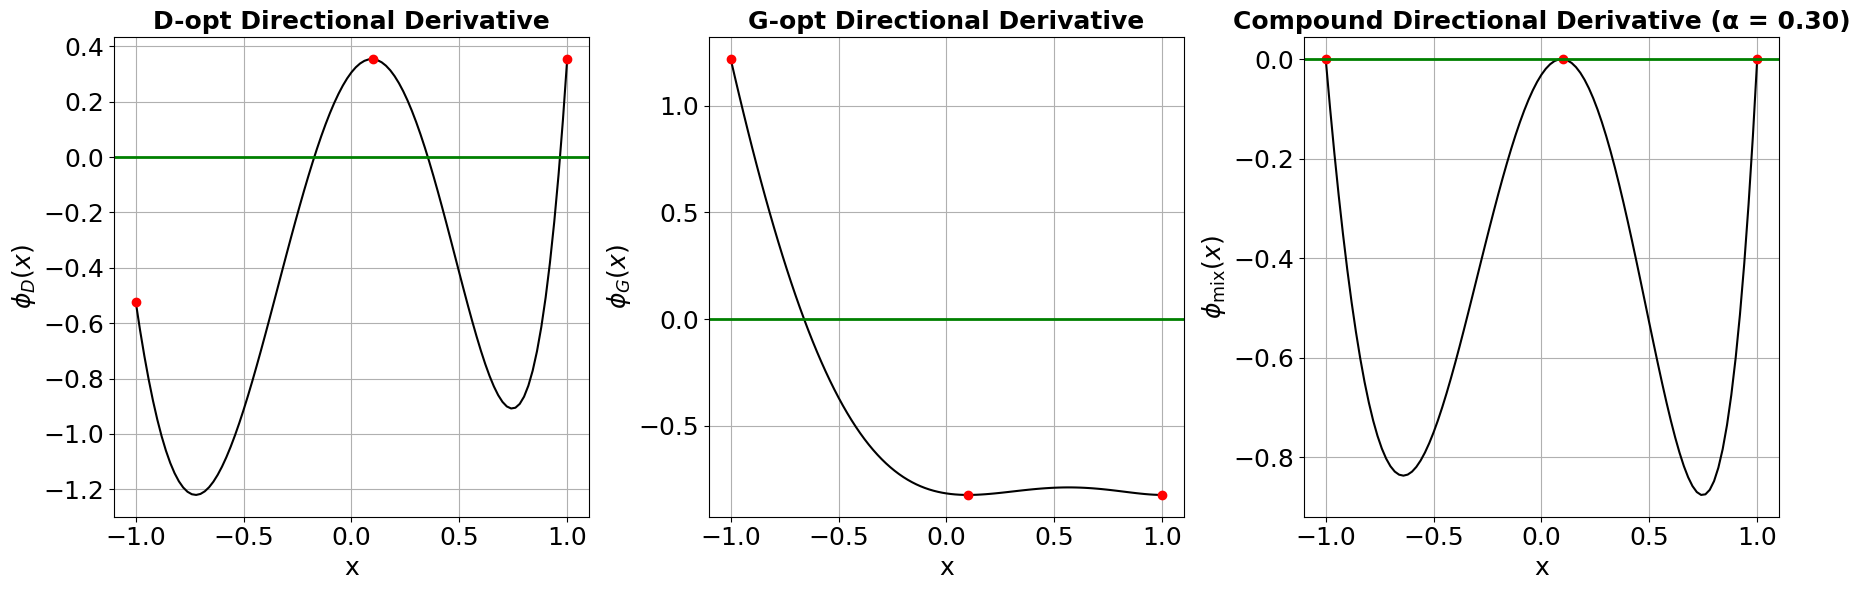


[α = 0.4] Support points and weights:
x = -1.000, weight = 0.417
x = 0.100, weight = 0.292
x = 1.000, weight = 0.292


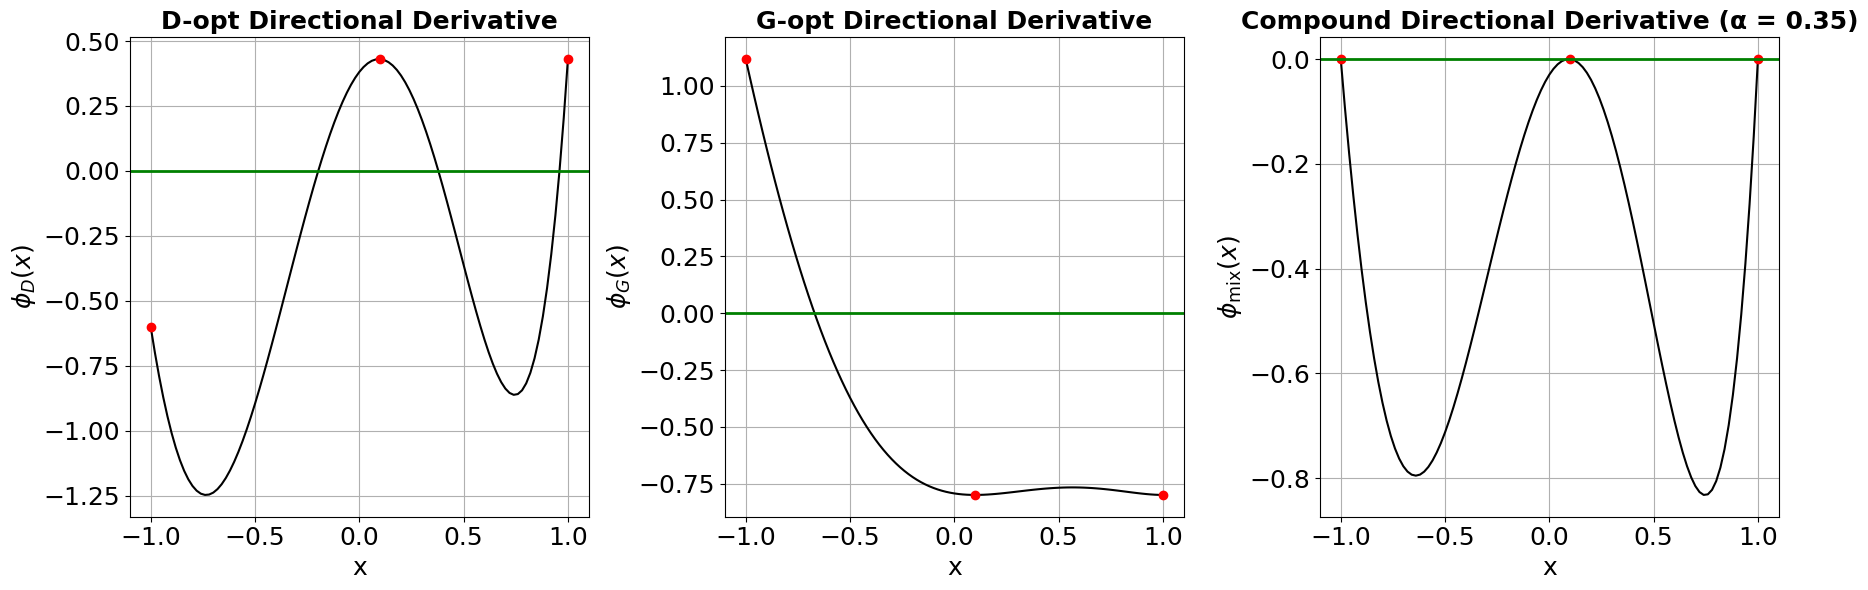


[α = 0.4] Support points and weights:
x = -1.000, weight = 0.431
x = 0.100, weight = 0.284
x = 1.000, weight = 0.284


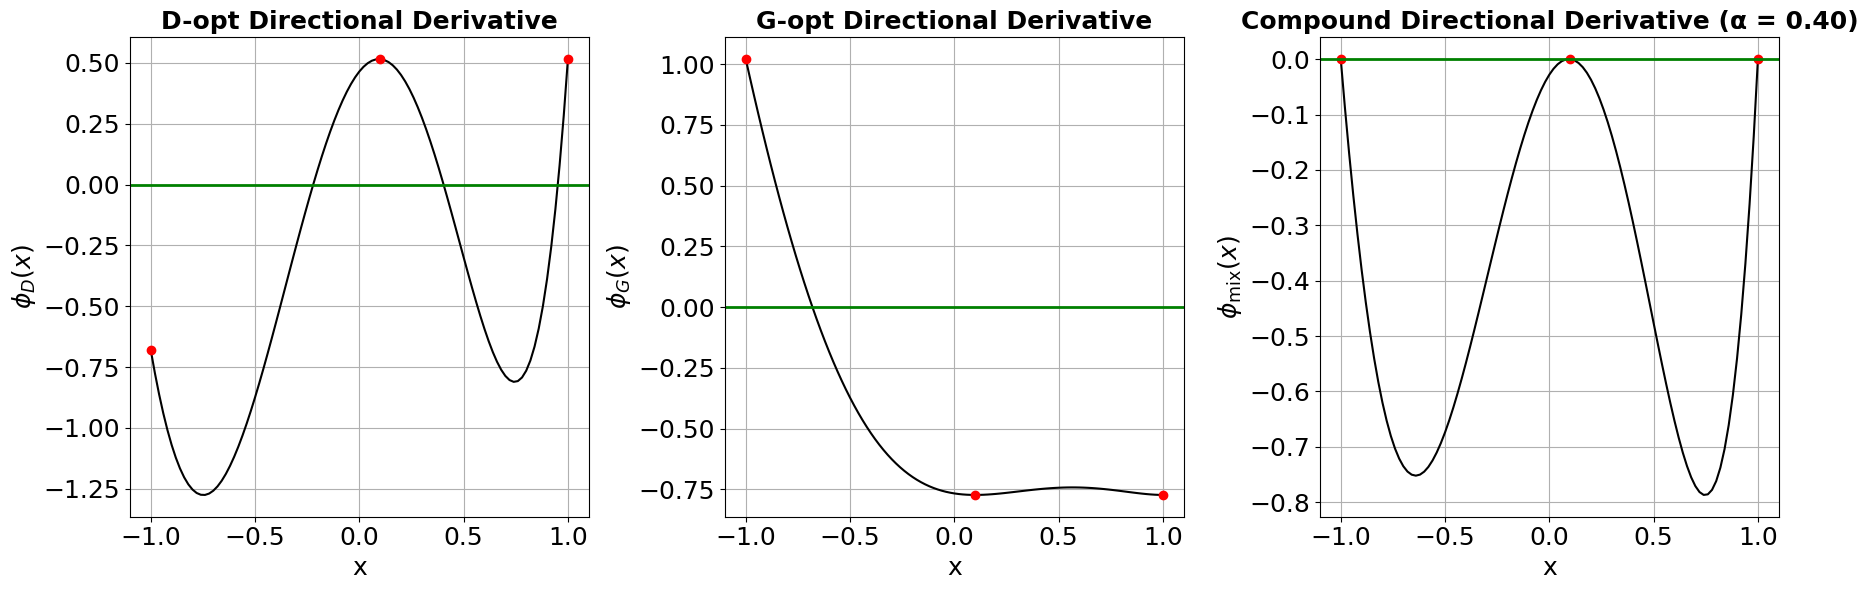


[α = 0.5] Support points and weights:
x = -1.000, weight = 0.446
x = 0.100, weight = 0.277
x = 1.000, weight = 0.277


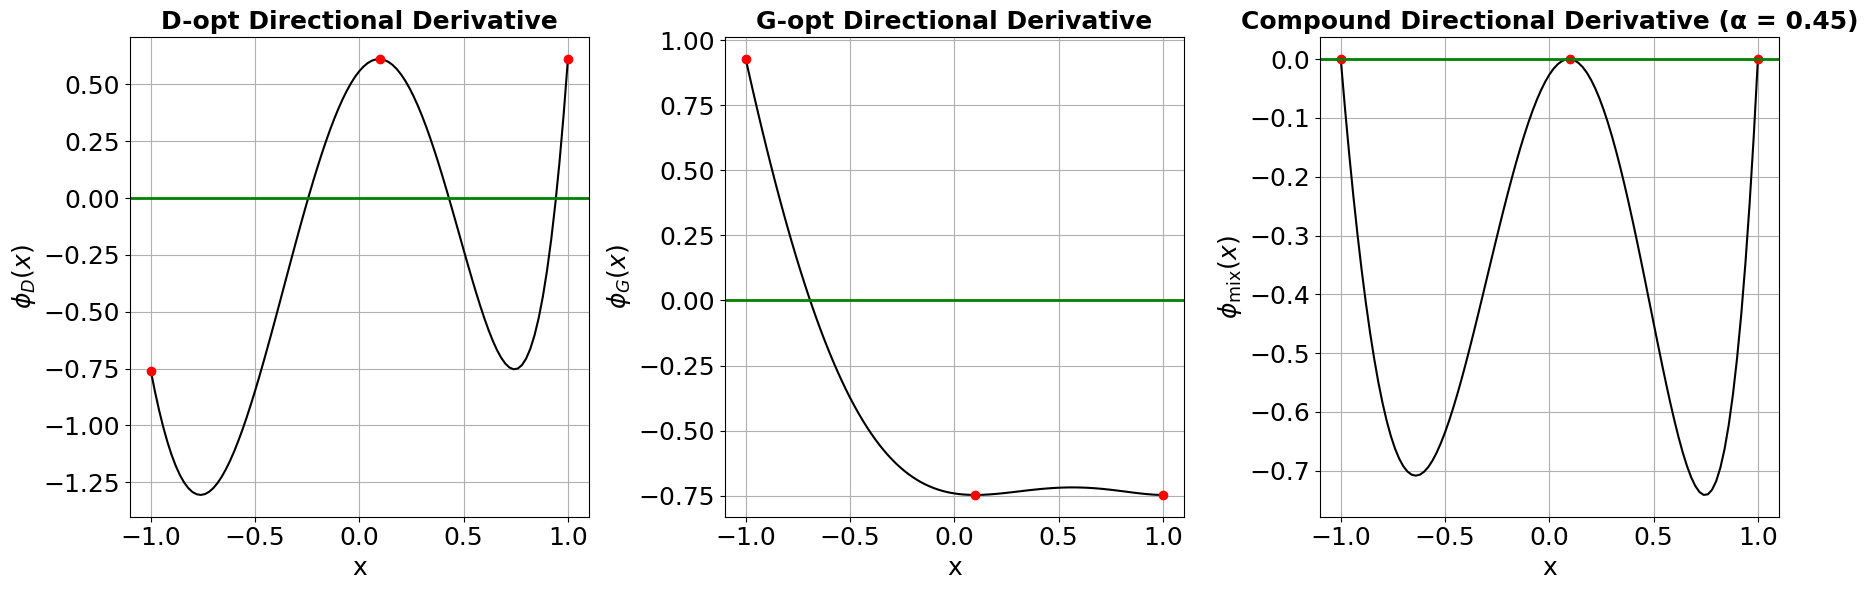


[α = 0.5] Support points and weights:
x = -1.000, weight = 0.460
x = 0.100, weight = 0.272
x = 1.000, weight = 0.268


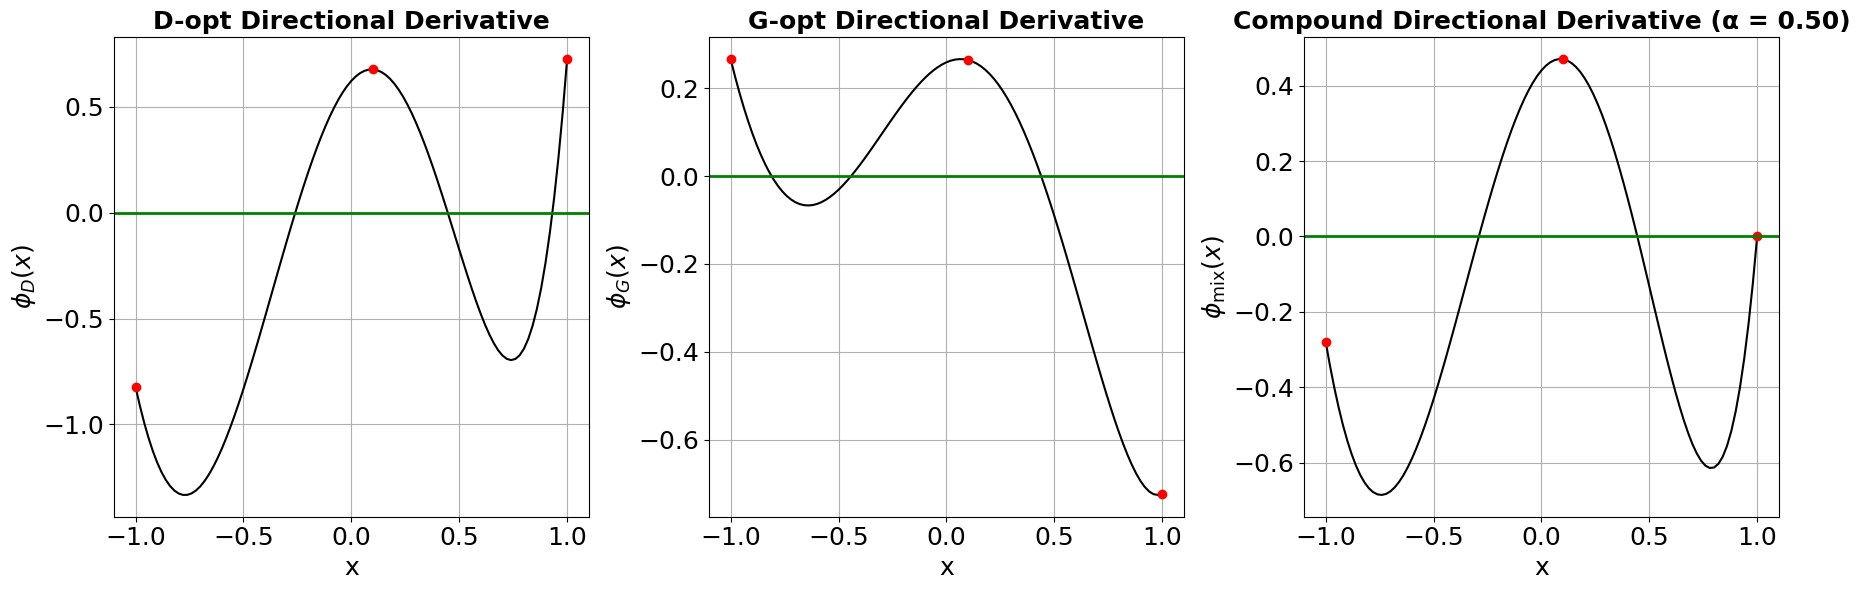


[α = 0.6] Support points and weights:
x = -1.000, weight = 0.466
x = 0.100, weight = 0.276
x = 1.000, weight = 0.258


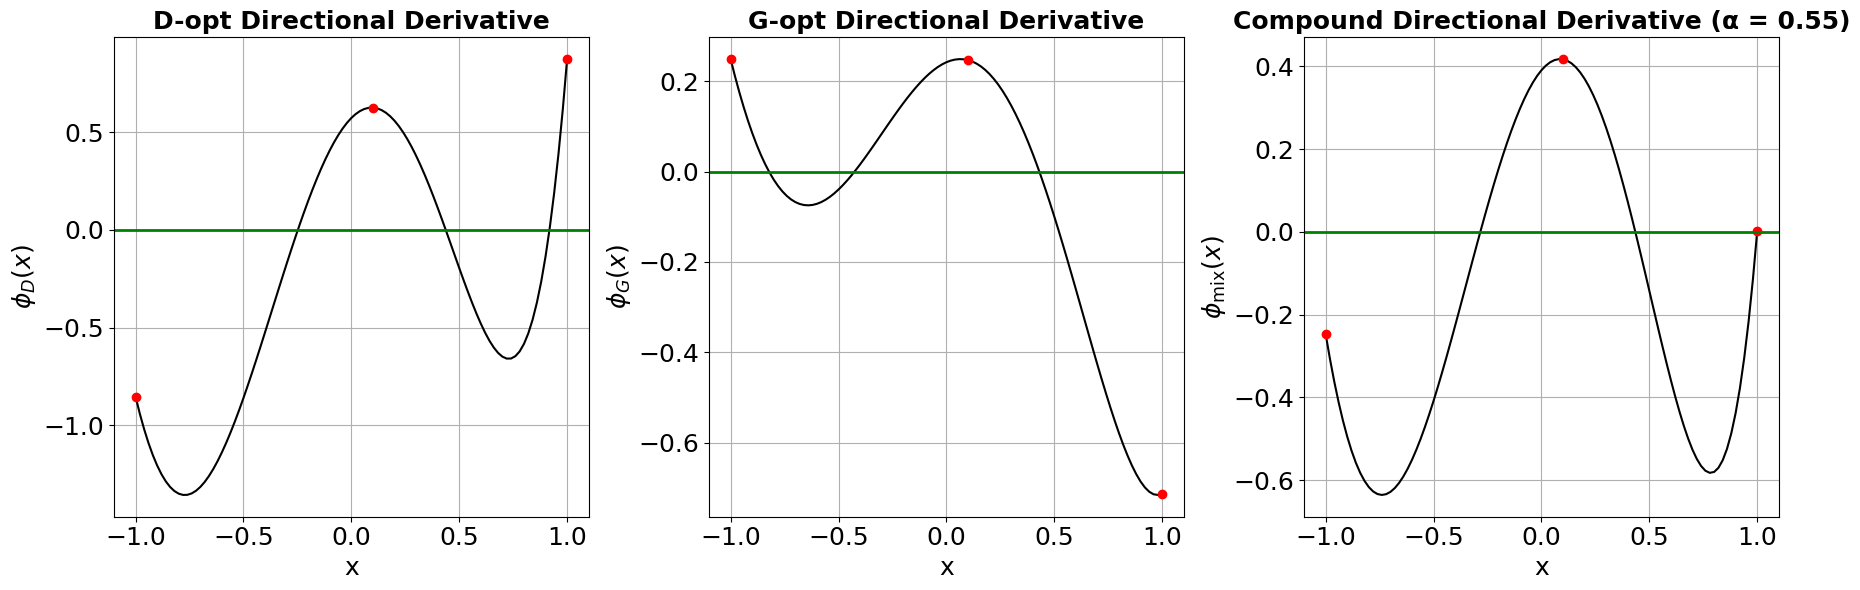


[α = 0.6] Support points and weights:
x = -1.000, weight = 0.473
x = 0.080, weight = 0.019
x = 0.100, weight = 0.261
x = 1.000, weight = 0.247


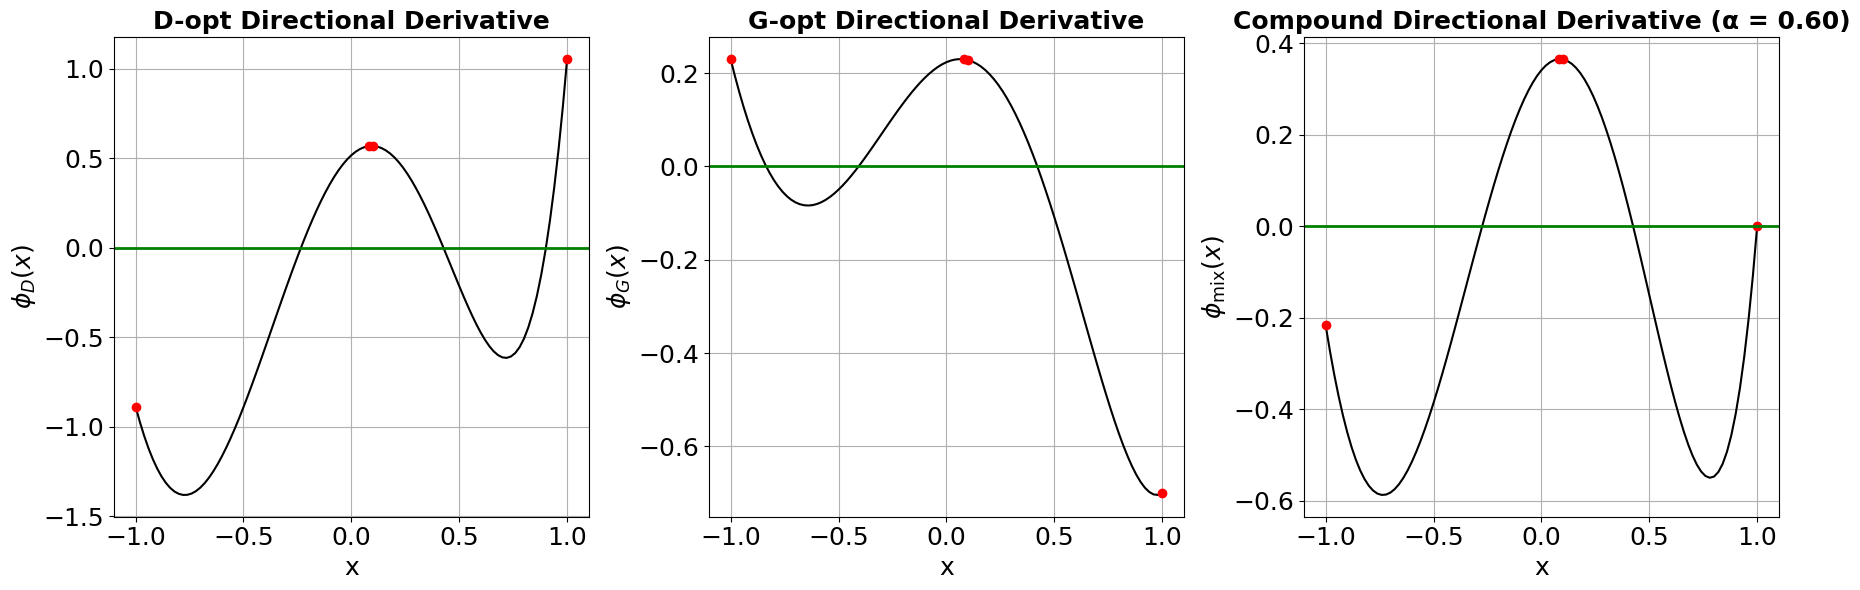


[α = 0.7] Support points and weights:
x = -1.000, weight = 0.482
x = 0.080, weight = 0.102
x = 0.100, weight = 0.183
x = 1.000, weight = 0.234


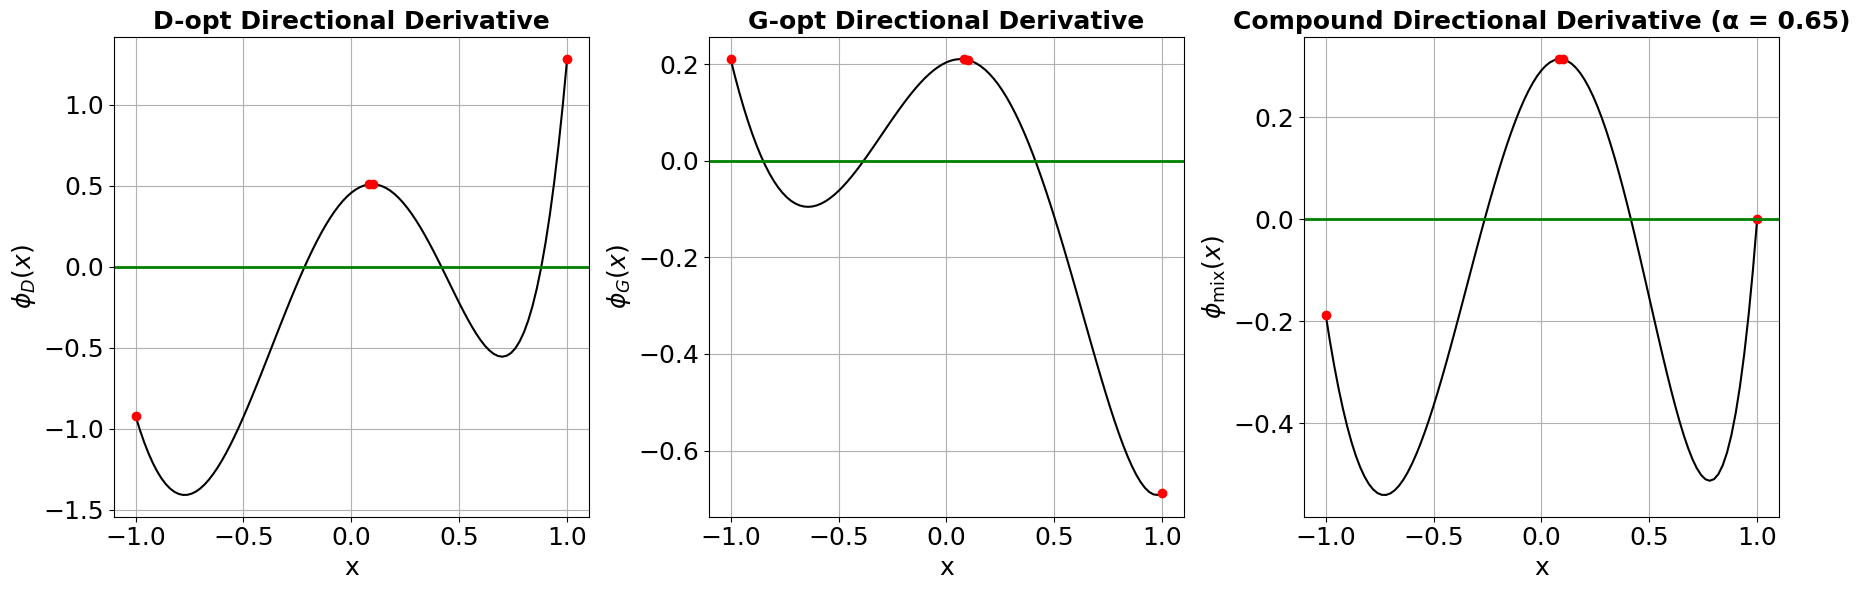


[α = 0.7] Support points and weights:
x = -1.000, weight = 0.491
x = 0.080, weight = 0.197
x = 0.100, weight = 0.093
x = 1.000, weight = 0.218


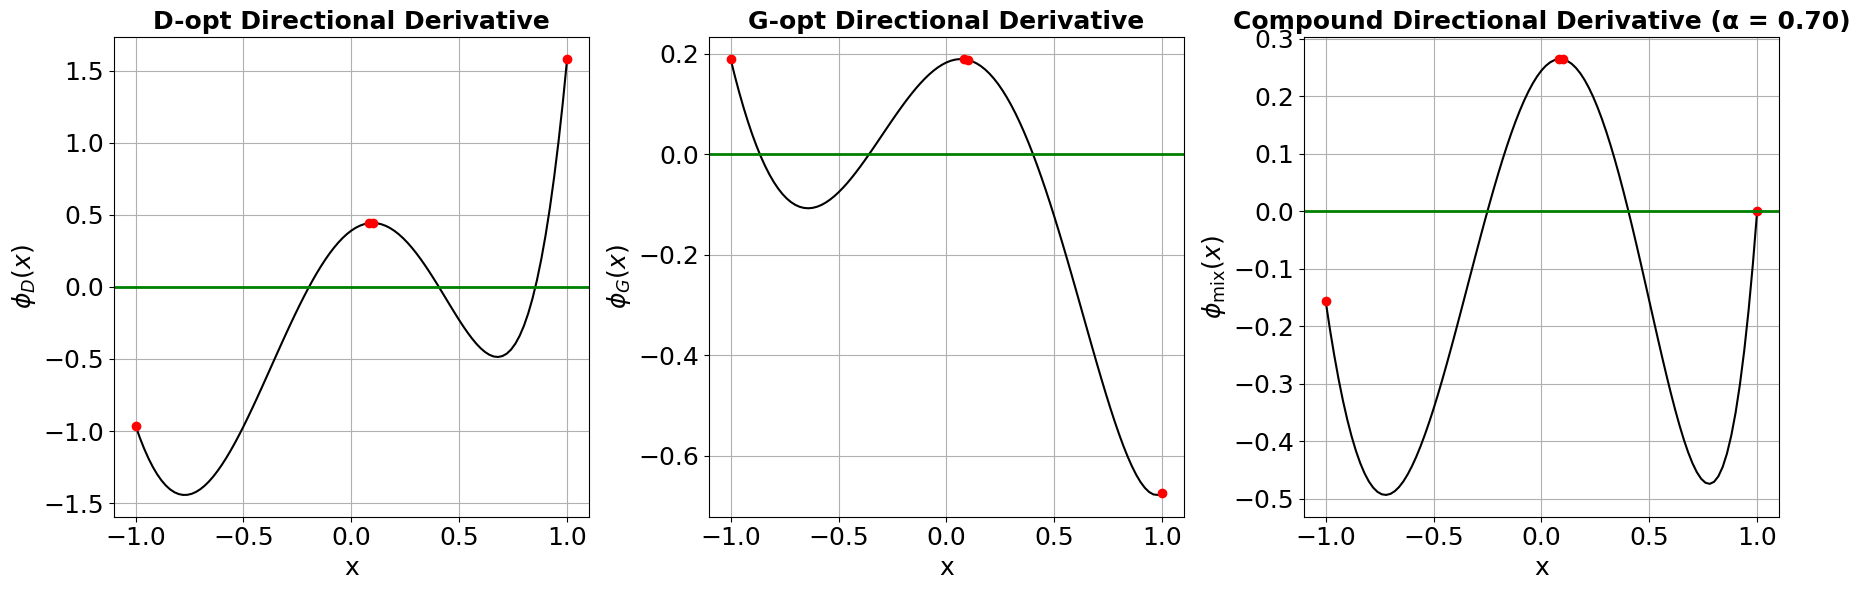


[α = 0.8] Support points and weights:
x = -1.000, weight = 0.495
x = 0.080, weight = 0.283
x = 0.100, weight = 0.010
x = 1.000, weight = 0.212


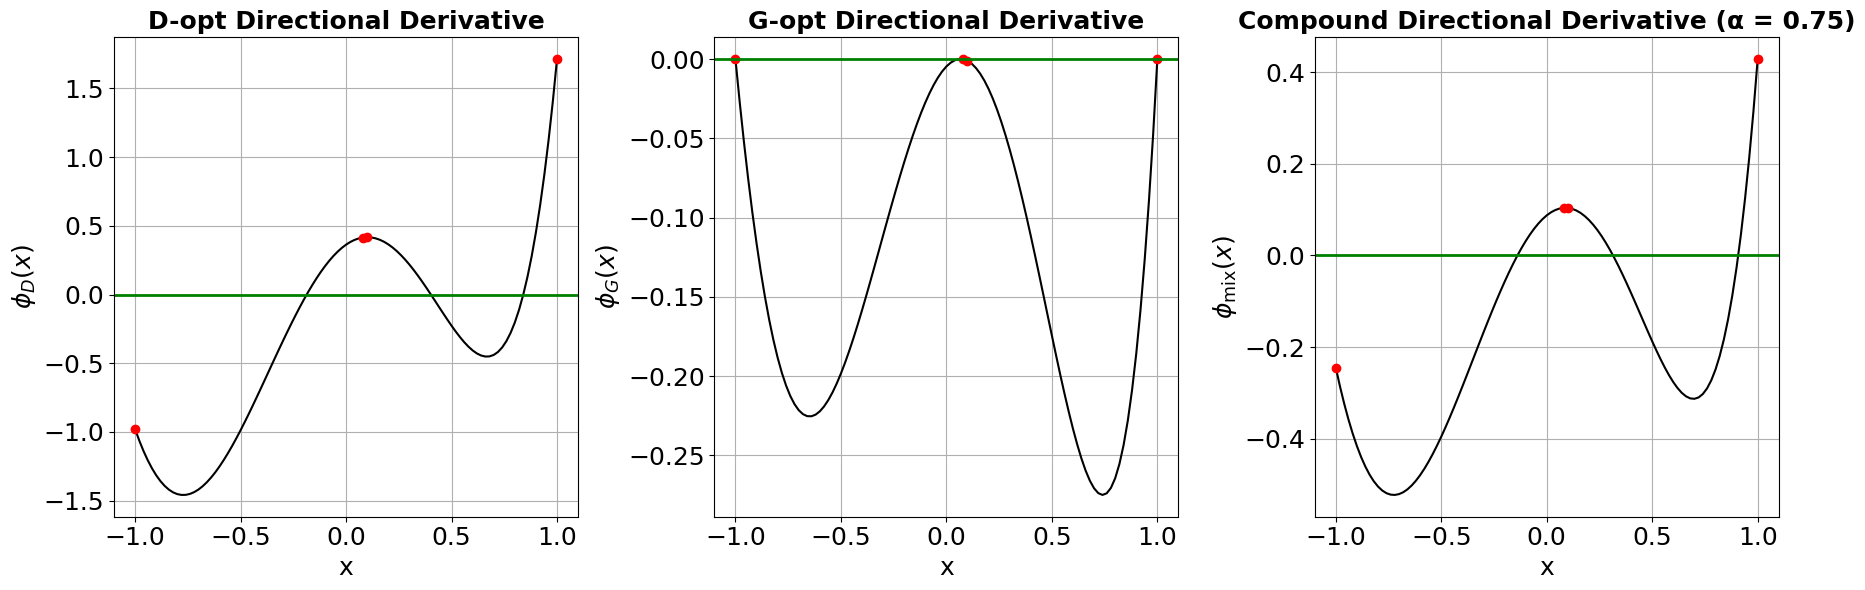


[α = 0.8] Support points and weights:
x = -1.000, weight = 0.495
x = 0.080, weight = 0.293
x = 1.000, weight = 0.212


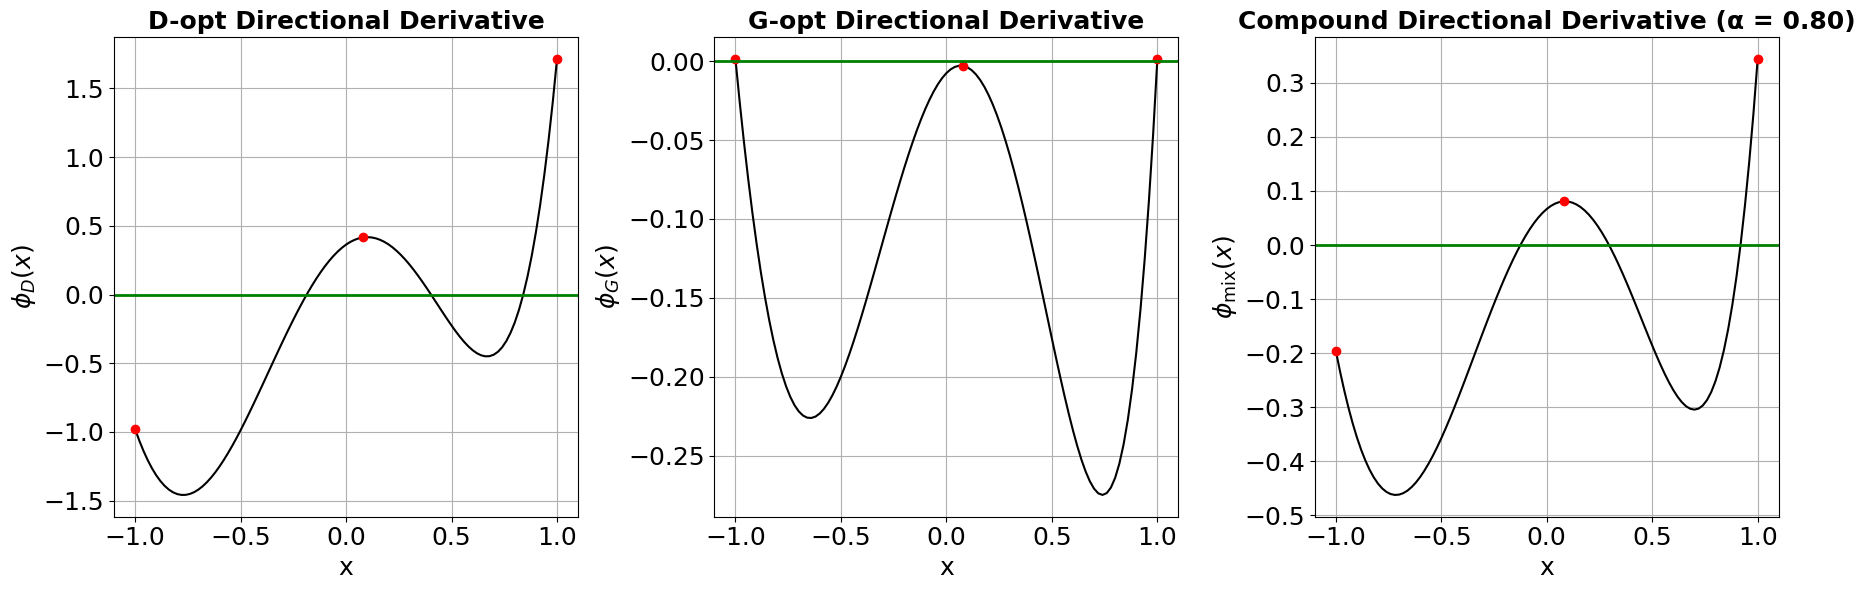


[α = 0.9] Support points and weights:
x = -1.000, weight = 0.495
x = 0.080, weight = 0.293
x = 1.000, weight = 0.212


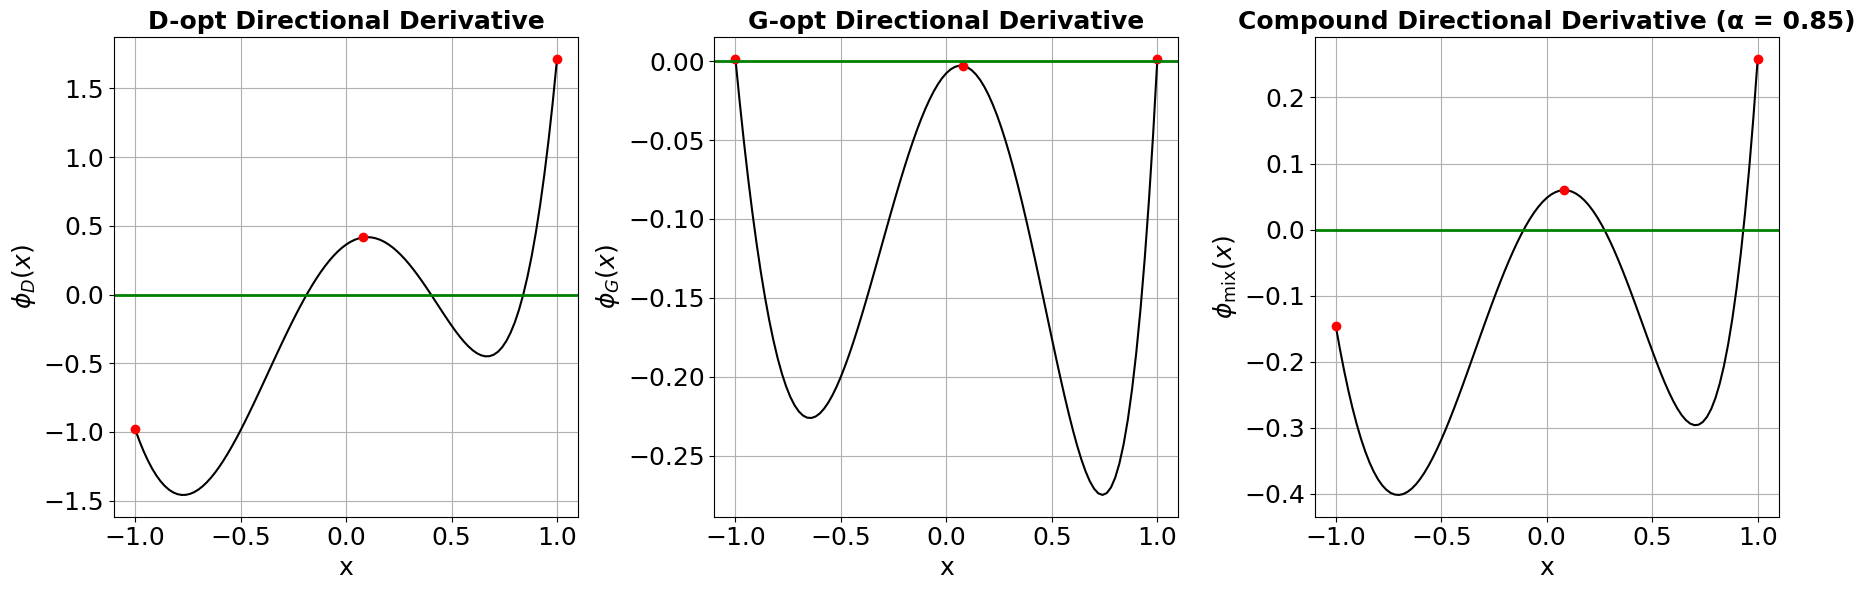


[α = 0.9] Support points and weights:
x = -1.000, weight = 0.495
x = 0.080, weight = 0.293
x = 1.000, weight = 0.212


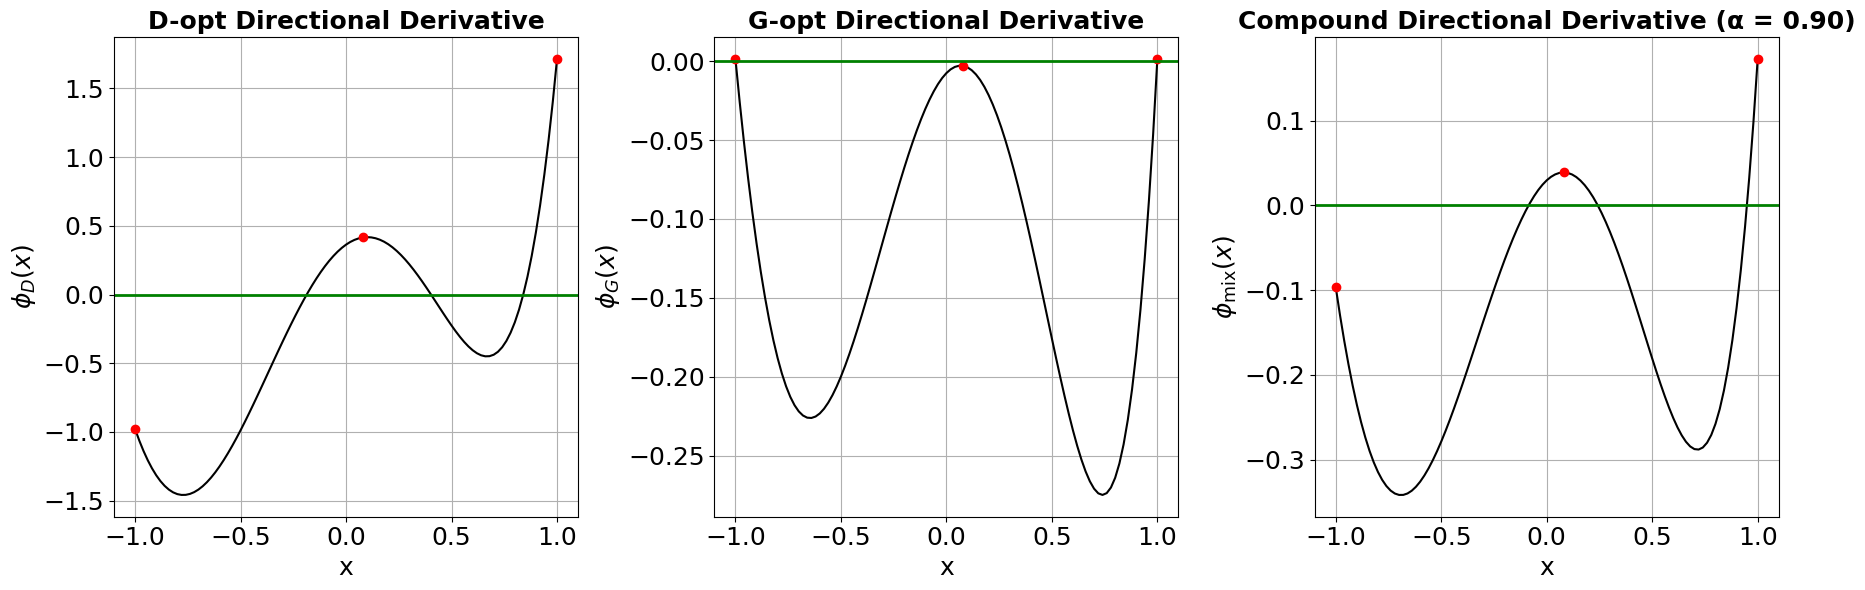


[α = 1.0] Support points and weights:
x = -1.000, weight = 0.495
x = 0.080, weight = 0.293
x = 1.000, weight = 0.212


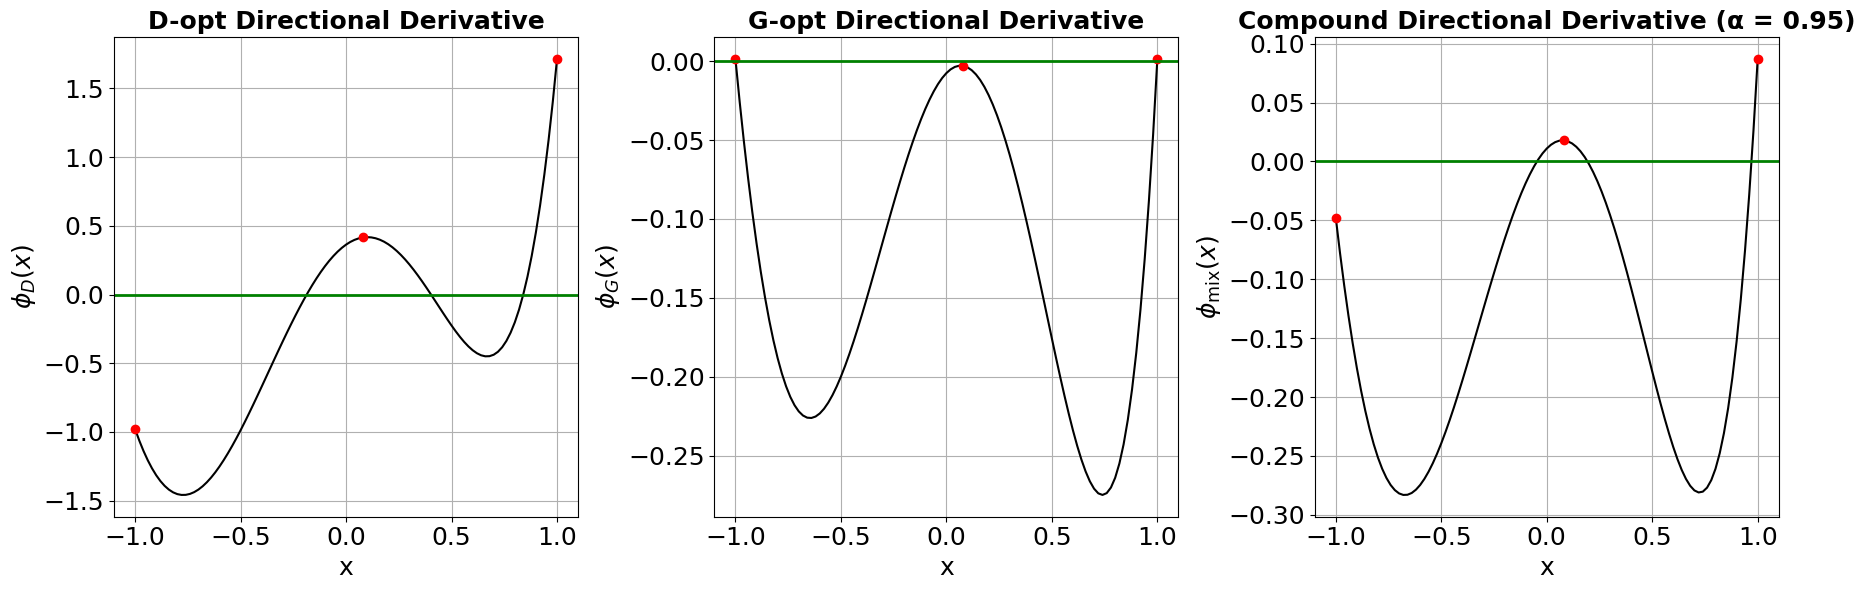


[α = 1.0] Support points and weights:
x = -1.000, weight = 0.495
x = 0.060, weight = 0.046
x = 0.080, weight = 0.247
x = 1.000, weight = 0.212


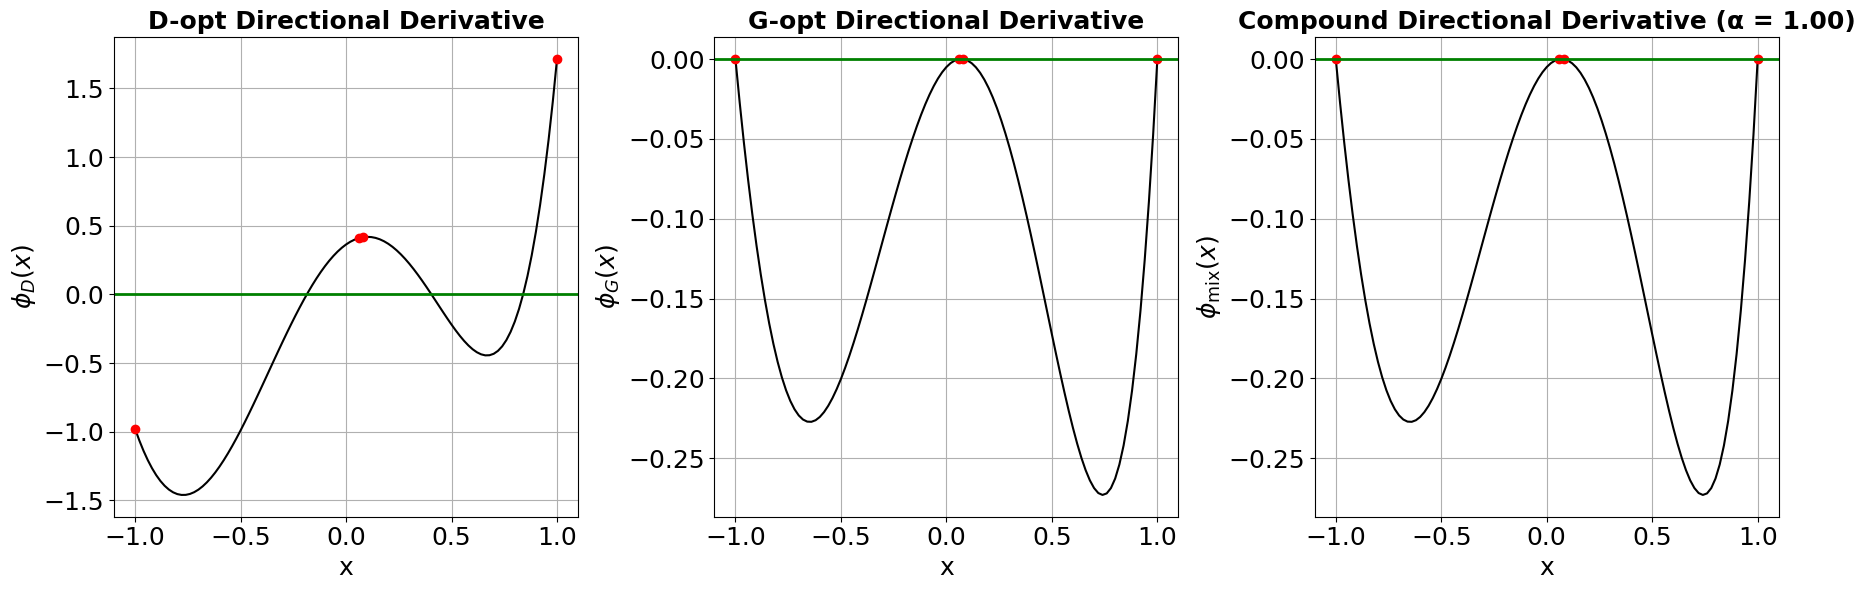

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# === Settings ===
g = lambda x: np.array([1, x, x**2])
lambda_fn = lambda x: 2 * x + 5
N = 101
Nz = 101
x_vals = np.linspace(-1, 1, N)
z_vals = np.linspace(-1, 1, Nz)
q = 3
I = np.eye(q)

for alpha in np.linspace(0, 1, 21):
    g_list = [g(x) for x in x_vals]
    gz_list = [g(z) for z in z_vals]
    lambda_vals = np.array([lambda_fn(x) for x in x_vals])

    w = cp.Variable(N)
    t = cp.Variable()
    M = sum(w[i] * lambda_vals[i] * np.outer(g_list[i], g_list[i]) for i in range(N))
    constraints = [cp.sum(w) == 1, w >= 0] + [
        cp.matrix_frac(gz_list[j], M) <= t for j in range(Nz)
    ]
    objective = cp.Minimize(alpha * t - (1 - alpha) * cp.log_det(M))
    prob = cp.Problem(objective, constraints)

    if 'MOSEK' in cp.installed_solvers():
        prob.solve(solver=cp.MOSEK, verbose=False)
    else:
        prob.solve(solver=cp.SCS, eps=1e-9, max_iters=50000, verbose=False)

    w_opt = w.value
    support_idx = np.where(w_opt > 1e-4)[0]
    x_out = np.round(x_vals[support_idx], 3)
    w_out = np.round(w_opt[support_idx], 3)
    print(f"\n[α = {alpha:.1f}] Support points and weights:")
    for x, w_ in zip(x_out, w_out):
        print(f"x = {x:.3f}, weight = {w_:.3f}")

    M_val = sum(w_opt[i] * lambda_vals[i] * np.outer(g_list[i], g_list[i]) for i in range(N))
    M_inv = np.linalg.inv(M_val)
    phiD = np.array([lambda_vals[i] * g_list[i].T @ M_inv @ g_list[i] - q for i in range(N)])

    v_vals = np.array([gz.T @ M_inv @ gz for gz in gz_list])
    v_max = np.max(v_vals)
    tol = 1e-8
    max_indices = np.where(np.abs(v_vals - v_max) < tol)[0]
    dim_A = len(max_indices)
    gz_mat = np.column_stack([gz_list[j] for j in max_indices])

    def compute_c_given_mu(mu):
        c = np.zeros(N)
        for i in range(N):
            gx = g_list[i]
            r = np.array([(gx.T @ M_inv @ gz_mat[:, j]) ** 2 for j in range(dim_A)])
            c[i] = lambda_vals[i] * np.sum(mu * r) - v_max
        return np.max(c)

    mu0 = np.ones(dim_A) / dim_A
    res = minimize(
        compute_c_given_mu, mu0,
        bounds=[(0, 1)] * dim_A,
        constraints=[{'type': 'eq', 'fun': lambda mu: np.sum(mu) - 1}],
        method='SLSQP'
    )
    mu_star = res.x

    dphiG = np.zeros(N)
    for i in range(N):
        gx = g_list[i]
        r = np.array([(gx.T @ M_inv @ gz_mat[:, j]) ** 2 for j in range(dim_A)])
        dphiG[i] = lambda_vals[i] * np.sum(mu_star * r) - v_max

    phiMix = alpha * dphiG + (1 - alpha) * phiD

    fontsize = 18
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].plot(x_vals, phiD, 'k-', linewidth=1.5)
    axs[0].plot(x_vals[support_idx], phiD[support_idx], 'ro', markersize=6)
    axs[0].axhline(0, color='g', linewidth=2)
    axs[0].set_xlabel('x', fontsize=fontsize)
    axs[0].set_ylabel(r'$\phi_D(x)$', fontsize=fontsize)
    axs[0].set_title('D-opt Directional Derivative', fontsize=fontsize, fontweight='bold')
    axs[0].tick_params(labelsize=fontsize)
    axs[0].grid(True)

    axs[1].plot(x_vals, dphiG, 'k-', linewidth=1.5)
    axs[1].plot(x_vals[support_idx], dphiG[support_idx], 'ro', markersize=6)
    axs[1].axhline(0, color='g', linewidth=2)
    axs[1].set_xlabel('x', fontsize=fontsize)
    axs[1].set_ylabel(r'$\phi_G(x)$', fontsize=fontsize)
    axs[1].set_title('G-opt Directional Derivative', fontsize=fontsize, fontweight='bold')
    axs[1].tick_params(labelsize=fontsize)
    axs[1].grid(True)

    axs[2].plot(x_vals, phiMix, 'k-', linewidth=1.5)
    axs[2].plot(x_vals[support_idx], phiMix[support_idx], 'ro', markersize=6)
    axs[2].axhline(0, color='g', linewidth=2)
    axs[2].set_xlabel('x', fontsize=fontsize)
    axs[2].set_ylabel(r'$\phi_{\mathrm{mix}}(x)$', fontsize=fontsize)
    axs[2].set_title(f'Compound Directional Derivative (α = {alpha:.2f})',
                     fontsize=fontsize, fontweight='bold')
    axs[2].tick_params(labelsize=fontsize)
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()